# Proyecto 02 - Reconocimiento de patrones

## Giovanni Gamaliel López Padilla

### Versión imagenes con alto contraste

### Librerias

In [2]:
## Ejecutar si se usa Google Colab
!pip install git+https://github.com/tensorflow/examples.git -q

    Running setup.py install for tensorflow-examples ... done
  DEPRECATION: tensorflow-examples was installed using the legacy 'setup.py install' method, because a wheel could not be built for it. A possible replacement is to fix the wheel build issue reported above. You can find discussion regarding this at https://github.com/pypa/pip/issues/8368.


In [3]:
from Modules.params import get_params,get_args,organization_files,mkdir
from Modules.unet_model import unet_model,transform_image
from Modules.generators import generator_model

### Parametros de direcciones y argumentos del modelo

In [4]:
params=get_params("high contrast")
params=organization_files(params)
args=get_args(params)
data_generator=generator_model(params,args)

Found 1008 images belonging to 1 classes.
Found 1008 images belonging to 1 classes.
Found 252 images belonging to 1 classes.
Found 252 images belonging to 1 classes.
Found 20 images belonging to 1 classes.
Found 20 images belonging to 1 classes.


## Entrenamiento de modelos

### Capas no entrenables

In [ ]:
model=unet_model("none")
model.compile()
params["model name"]="model_01.h5"
params["history name"]="history_01.csv"
model.run(params,args,data_generator)

9420800/9406464 [==============================] - 0s 0us/step
Epoch 1/15
31/31 [==============================] - 737s 24s/step - loss: 0.5414 - accuracy: 0.7661 - val_loss: 0.4346 - val_accuracy: 0.8739
Epoch 2/15
31/31 [==============================] - 49s 2s/step - loss: 0.3977 - accuracy: 0.8518 - val_loss: 0.3396 - val_accuracy: 0.9093
Epoch 3/15
31/31 [==============================] - 48s 2s/step - loss: 0.3478 - accuracy: 0.8667 - val_loss: 0.2918 - val_accuracy: 0.9169
Epoch 4/15
31/31 [==============================] - 48s 2s/step - loss: 0.3241 - accuracy: 0.8748 - val_loss: 0.2633 - val_accuracy: 0.9219
Epoch 5/15
31/31 [==============================] - 48s 2s/step - loss: 0.3061 - accuracy: 0.8825 - val_loss: 0.2417 - val_accuracy: 0.9256
Epoch 6/15
31/31 [==============================] - 48s 2s/step - loss: 0.2957 - accuracy: 0.8865 - val_loss: 0.2264 - val_accuracy: 0.9294
Epoch 7/15
31/31 [==============================] - 48s 2s/step - loss: 0.2840 - accuracy: 0.89

### Fine tunning

In [ ]:
model = unet_model("last conv")
model.compile()
params["model name"]="model_02.h5"
params["history name"]="history_02.csv"
model.run(params,args,data_generator)

9420800/9406464 [==============================] - 0s 0us/step
Epoch 1/15
31/31 [==============================] - 438s 14s/step - loss: 0.5495 - accuracy: 0.7082 - val_loss: 0.4758 - val_accuracy: 0.7773
Epoch 2/15
31/31 [==============================] - 49s 2s/step - loss: 0.4225 - accuracy: 0.8421 - val_loss: 0.3786 - val_accuracy: 0.8795
Epoch 3/15
31/31 [==============================] - 48s 2s/step - loss: 0.3669 - accuracy: 0.8722 - val_loss: 0.3195 - val_accuracy: 0.9121
Epoch 4/15
31/31 [==============================] - 49s 2s/step - loss: 0.3377 - accuracy: 0.8793 - val_loss: 0.2849 - val_accuracy: 0.9210
Epoch 5/15
31/31 [==============================] - 51s 2s/step - loss: 0.3181 - accuracy: 0.8842 - val_loss: 0.2590 - val_accuracy: 0.9251
Epoch 6/15
31/31 [==============================] - 49s 2s/step - loss: 0.3059 - accuracy: 0.8868 - val_loss: 0.2423 - val_accuracy: 0.9285
Epoch 7/15
31/31 [==============================] - 49s 2s/step - loss: 0.2934 - accuracy: 0.89

### Full tunning

In [ ]:
model = unet_model("all")
model.compile()
params["model name"]="model_03.h5"
params["history name"]="history_03.csv"
model.run(params,args,data_generator)

9420800/9406464 [==============================] - 0s 0us/step
Epoch 1/15
31/31 [==============================] - 311s 10s/step - loss: 0.5803 - accuracy: 0.7166 - val_loss: 0.4266 - val_accuracy: 0.8781
Epoch 2/15
31/31 [==============================] - 52s 2s/step - loss: 0.4093 - accuracy: 0.8458 - val_loss: 0.3259 - val_accuracy: 0.9120
Epoch 3/15
31/31 [==============================] - 53s 2s/step - loss: 0.3476 - accuracy: 0.8734 - val_loss: 0.2702 - val_accuracy: 0.9230
Epoch 4/15
31/31 [==============================] - 51s 2s/step - loss: 0.3174 - accuracy: 0.8839 - val_loss: 0.2382 - val_accuracy: 0.9299
Epoch 5/15
31/31 [==============================] - 51s 2s/step - loss: 0.2963 - accuracy: 0.8912 - val_loss: 0.2167 - val_accuracy: 0.9325
Epoch 6/15
31/31 [==============================] - 50s 2s/step - loss: 0.2843 - accuracy: 0.8946 - val_loss: 0.2013 - val_accuracy: 0.9355
Epoch 7/15
31/31 [==============================] - 50s 2s/step - loss: 0.2713 - accuracy: 0.89

## Resultados

### Accucary y loss

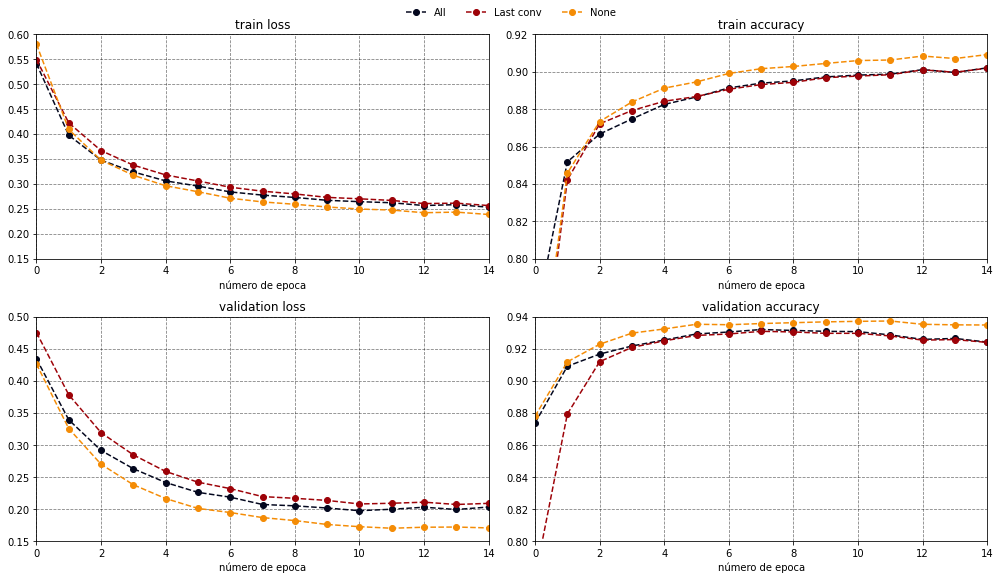

In [ ]:
from numpy import linspace, array
import matplotlib.pyplot as plt
from pandas import read_csv
from os.path import join

datasets_parameters = {
    "files":["history_01.csv",
             "history_02.csv",
             "history_03.csv"],
    "loss": {
        "y lim": [0.15, 0.6],
        "title": "train loss"
    },
    "accuracy": {
        "y lim": [0.8, 0.92],
        "title": "train accuracy"},
    "val_loss": {
        "y lim": [0.15, 0.5],
        "title": "validation loss"
    },
    "val_accuracy": {
        "y lim": [0.8, 0.94],
        "title": "validation accuracy"
    },
}
colors = {"history_01.csv": {"color":"#03071e",
                             "title": "All"},
          "history_02.csv": {"color":"#9d0208",
                             "title": "Last conv"},
          "history_03.csv": {"color":"#f48c06",
                             "title": "None"},
          }
history={}
for filename in datasets_parameters["files"]:
    file = join(params["path results"],
                    filename)
    data = read_csv(file,
                    index_col=0)
    history[filename] = data.copy()

fig, axs = plt.subplots(2, 2,
                        figsize=(14, 8))
axs=axs.flatten()
for train_type in history:
    data = history[train_type]
    color = colors[train_type]["color"]
    title = colors[train_type]["title"]
    for ax, parameter in zip(axs, data.columns):
        dataset = datasets_parameters[parameter]
        parameter_data = data[parameter]
        epochs = list(data.index)
        ax.plot(epochs,
                parameter_data,
                label=title,
                color=color,
                ls="--",
                marker="o")
        ax.set_title(datasets_parameters[parameter]["title"])
        ax.set_xlabel("número de epoca")
        ax.set_xlim(0,14)
        ax.set_ylim(dataset["y lim"][0],
                    dataset["y lim"][1])
        ax.grid(ls="--",
                color="#000000",
                alpha=0.5)
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles,
           labels,
           bbox_to_anchor=(0.62,
                           1.01),
           ncol=3,
           frameon=False
           )
plt.tight_layout()
plt.show()

La función de perdida para los datos de entrenamiento y validación decae conforme aumenta el número de epoca. Teniendo que la red con los pesos congelados de MobileNet obtiene valores menores en el conjunto de entrenamiento, en cambio, la red con todos los nodos descongelados y descongelando la última capa convolucional obtiene menores con el conjunto de validación.

Una situación semejante sucede con los valores de accuracy. En el conjunto de entramiento, la red con los pesos de MobleNet obtiene mejores resultados, sin embargo, el accuracy obtenido con los datos de validación es semejante en los tres tipos de modelos. Los modelos con capas descongeladas obtiene mejores valores de accuracy con menor número de epocas.

Realizando comparaciones con Israr Ahmed (https://www.kaggle.com/code/israrahmed919/brain-mri-segmentation-usingtf-unet), el modelo obtenido en esta tarea refleja mejores valores a los reportados en su gráfica. La diferencia entre los resultados no es significante.

### Predicciones

#### Lectura de los datos de test

In [5]:
import matplotlib.pyplot as plt
from os.path import join
import tensorflow as tf
from numpy import array
from tqdm import tqdm

images,masks=next(data_generator.test)

#### Lectura de los modelos

In [6]:
model_none=unet_model("none")
model_none.compile()
filename=join(params["path results"],
              "model_01.h5")
model_none.load(filename)

filename=join(params["path results"],
              "model_02.h5")
model_last=tf.keras.models.load_model(filename)

model_all=unet_model("all")
model_all.compile()
filename=join(params["path results"],
              "model_03.h5")
model_all.load(filename)

9420800/9406464 [==============================] - 0s 0us/step


#### Guardado de las predicciones

In [ ]:
def plot(ax:plt.axes,image:array,title:str):
    ax.set_title(title)
    ax.imshow(image,
              cmap="gray")
    ax.axis("off")

size = args.batch_size_test // 10
for i,(image,mask) in enumerate(zip(images,masks)):
    print("Creando imagen {} de {}".format(i+1,
                                           args.batch_size_test))
    # Prediccion none
    predict_none = model_none.predict(image)
    # Prediction last conv
    test_image=transform_image(image)
    predict_last = model_last.predict(test_image)
    predict_last=(predict_last[0,:,:,:]>0.5)
    # Prediccion all
    predict_all = model_all.predict(image)
    fig,(ax1,ax2,ax3,ax4)=plt.subplots(1,4,
                                        figsize=(20,6))
    plot(ax1,image,"Origianl")
    plot(ax2,predict_none[:,:,0],"None")
    plot(ax3,predict_last[:,:,0],"Fine tuning")
    plot(ax4,predict_all[:,:,0],"Full tuning")
    plt.tight_layout()
    filename = str(i).zfill(size)
    filename = join(params["path graphics"],
                    filename)
    plt.savefig(filename,
                dpi=400)